In [3]:
import pandas as pd
import fpsnippets as fp
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

# bring in datasets
arrest = pd.read_csv("arrests.csv", sep=",", low_memory=False)
nbhInfo = pd.read_csv("neighborhoods.csv", sep=",", low_memory=False)

#making a column for the neighborhoods to go in
arrest['neighborhood'] = ''

#making dictionaries
arrestCount = dict()
squareMiles = dict()

#code from a groupmate who did the exact same thing
#Iterate through the dataframe and add the neighborhood based on coors, then zip if no coors
for index, row in arrest.iterrows():
    outGeo = fp.geo_to_neighborhood(row['Y'], row['X'])
    final = ""
    if outGeo != "None":
        final = outGeo
    else:
        final = "None"
    
    arrest.at[index, "neighborhood"] = final
    
    #Manages a dictionary that I use later for my data frame
    if not(final in arrestCount):
        arrestCount[final] = int(1)
    else:
        arrestCount[final] += int(1)

#Removes data points with no location data
del arrestCount[None]

#This pulls the square mile information for the various neighborhoods and puts them in a dictionary
for index, row in nbhInfo.iterrows():
        squareMiles[row['hood']] = row['sqmiles']
        
print("done")

done


                           Number of Arrests Square Miles Ratio Rating
Central Business District               3609                          
South Side Flats                        3248                          
Homewood South                          2395                          
East Allegheny                          2164                          
Carrick                                 2062                          
...                                      ...          ...   ...    ...
Regent Square                             36                          
Ridgemont                                 28                          
East Carnegie                             25                          
Swisshelm Park                            25                          
New Homestead                             23                          

[90 rows x 4 columns]
                           Number of Arrests Square Miles        Ratio Rating
central business district               3609   

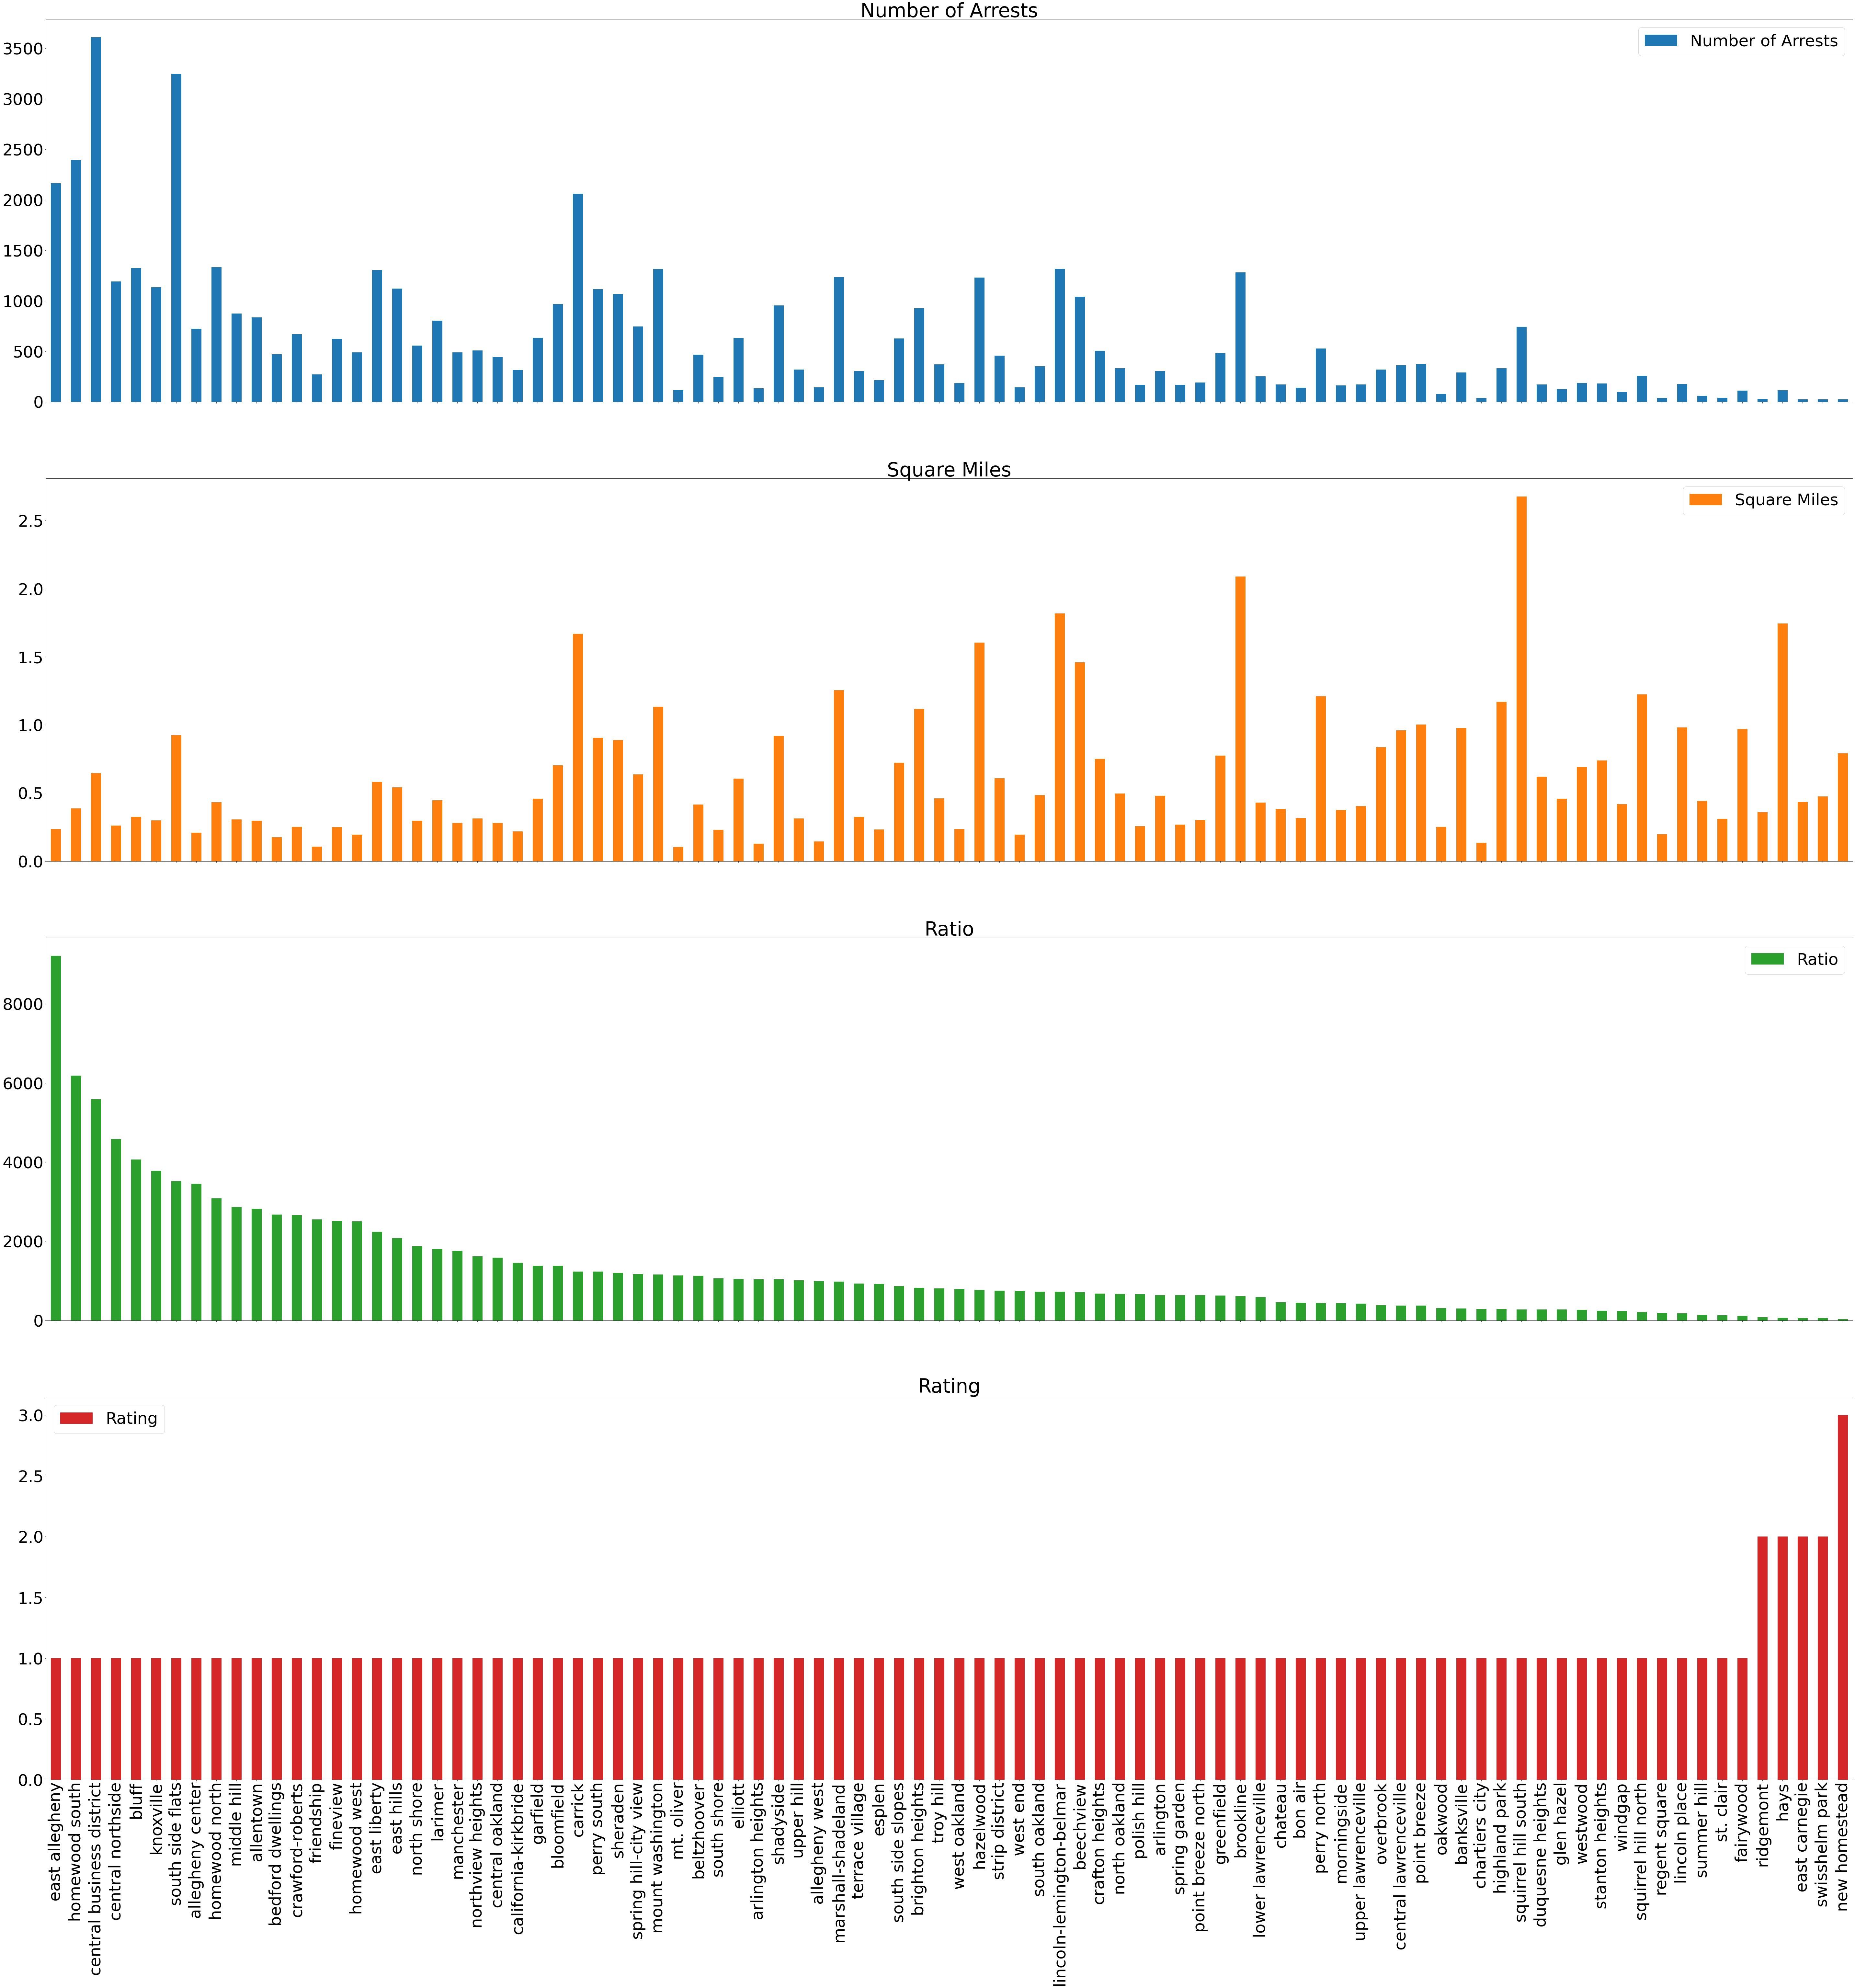

In [4]:
#This is for adjusting font size. Before I found this, the neighborhoods were unreadable
plt.rcParams.update({'font.size': 50})

#The final dataframe that I create from all the other previous dataframe and dictionaries
occur = pd.Series(arrestCount).sort_values(ascending=False).to_frame()

#Assigns the column name for the 1st set of data, then adds columns for the other data that will be added.
occur.columns =['Number of Arrests']
occur['Square Miles'] = ''
occur['Ratio'] = ''
occur['Rating'] = ''

print(occur)

occur.index = occur.index.str.lower()
squareMiles = {key.lower(): value for key, value in squareMiles.items()}

for index, row in occur.iterrows():
    # Retrieve the square miles for the neighborhood (case-insensitive)
    square_miles = squareMiles.get(index, 0.0)
    
    # Determine the ratio by (amount of fire incidents / square miles)
    if square_miles != 0.0:
        ratio = row['Number of Arrests'] / float(square_miles)
    else:
        # Handle the case where square_miles is zero (set ratio to a default value)
        ratio = 0.0
    #same tier system as others
    if ratio>100:
        rate = 1
    elif (ratio>50):
        rate = 2
    elif (ratio>10):
        rate = 3
    else:
        rate = 4
    
    #This just fills in the rest of the data set as it iterates
    occur.at[index,'Rating'] = rate
    occur.at[index,'Square Miles'] = squareMiles.get(index,0.0)
    occur.at[index,'Ratio'] = ratio

print(occur)
    
#I decided to use bar graphs for the time being, I may look into other types later. Figsize determines the dimensions, subplots makes a unique graph for each set of values in the frame.
occur.sort_values(by=['Ratio'], ascending=False).plot.bar(figsize=(100,100), subplots=True)
plt.show()